# Exploratory Data Analysis on Clam Age, Prediction Based on Physical Characteristics.

<div align="center">
    <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/a/ad/Clams_on_Sandy_Hook_beaches_-_panoramio.jpg/640px-Clams_on_Sandy_Hook_beaches_-_panoramio.jpg" width="400" height="300"/>
</div>

**The dataset given were about Clams (Kerang) and different characteristics of them:**

Exploratory Data Analysis will be conducted in order to predict the age of clams, based on these variables:

- Umur (Age): Categorical feature.
- Panjang (Length), Diameter Cangkang (Diameter), Tinggi (Height): Numerical features that can be combined to calculate the volume.
- Various weight measurements Berat Daging dan Cangkang, as well as Jenis Kelamin (Gender) can provide additional predictors for clam age.




## Importing the dataset

In [88]:
import pandas as pd

data = pd.read_csv("/kaggle/input/oemoempenugasanclamdata/Data OemOem Penugasa.csv")

## Vizualizing and Understanding the data

<div align="center">
    <img src="https://media.licdn.com/dms/image/D4E12AQExP3UyxJclyg/article-cover_image-shrink_720_1280/0/1690714406668?e=2147483647&v=beta&t=BR-mVYgG5SlOOlMcd434nseqifDRJtdAVYUphQ4Nk3U" width="550" height="350"/>
</div>

In [89]:
data.head()

,Jenis Kelamin,Panjang,Diameter Cangkang,Tinggi,Berat Daging Belum Dikupas,Berat Daging Udah Dikupas,Berat Organ Dalam,Berat Cangkang,Umur Kerang
0,Betina,1.3125,1.0625,0.3625,22.665425,9.482908,5.925046,6.803880,15
1,Indeterminate,1.3250,0.9875,0.2875,13.466012,5.740774,2.863300,NaN,8
2,Jantan,1.1250,0.8000,0.2500,10.801160,4.833590,2.126212,3.260193,9
3,Indeterminate,1.3500,0.9750,0.3125,17.732612,7.158249,4.479221,5.386405,8
4,Betina,NaN,1.2875,0.4250,36.542505,17.009700,8.348928,9.397859,9


In [90]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3342 entries, 0 to 3341
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Jenis Kelamin               3342 non-null   object 
 1   Panjang                     2678 non-null   float64
 2   Diameter Cangkang           3342 non-null   float64
 3   Tinggi                      3259 non-null   float64
 4   Berat Daging Belum Dikupas  3342 non-null   float64
 5   Berat Daging Udah Dikupas   3342 non-null   float64
 6   Berat Organ Dalam           3342 non-null   float64
 7   Berat Cangkang              3108 non-null   float64
 8   Umur Kerang                 3342 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 235.1+ KB


It can be inferred that the data that we're dealing with contains 9 variables. 
8 numerical, and 1 that is a string.

## Distribution Plot

To understand the data we're dealing with even better, these histograms should identify the spread of the data.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

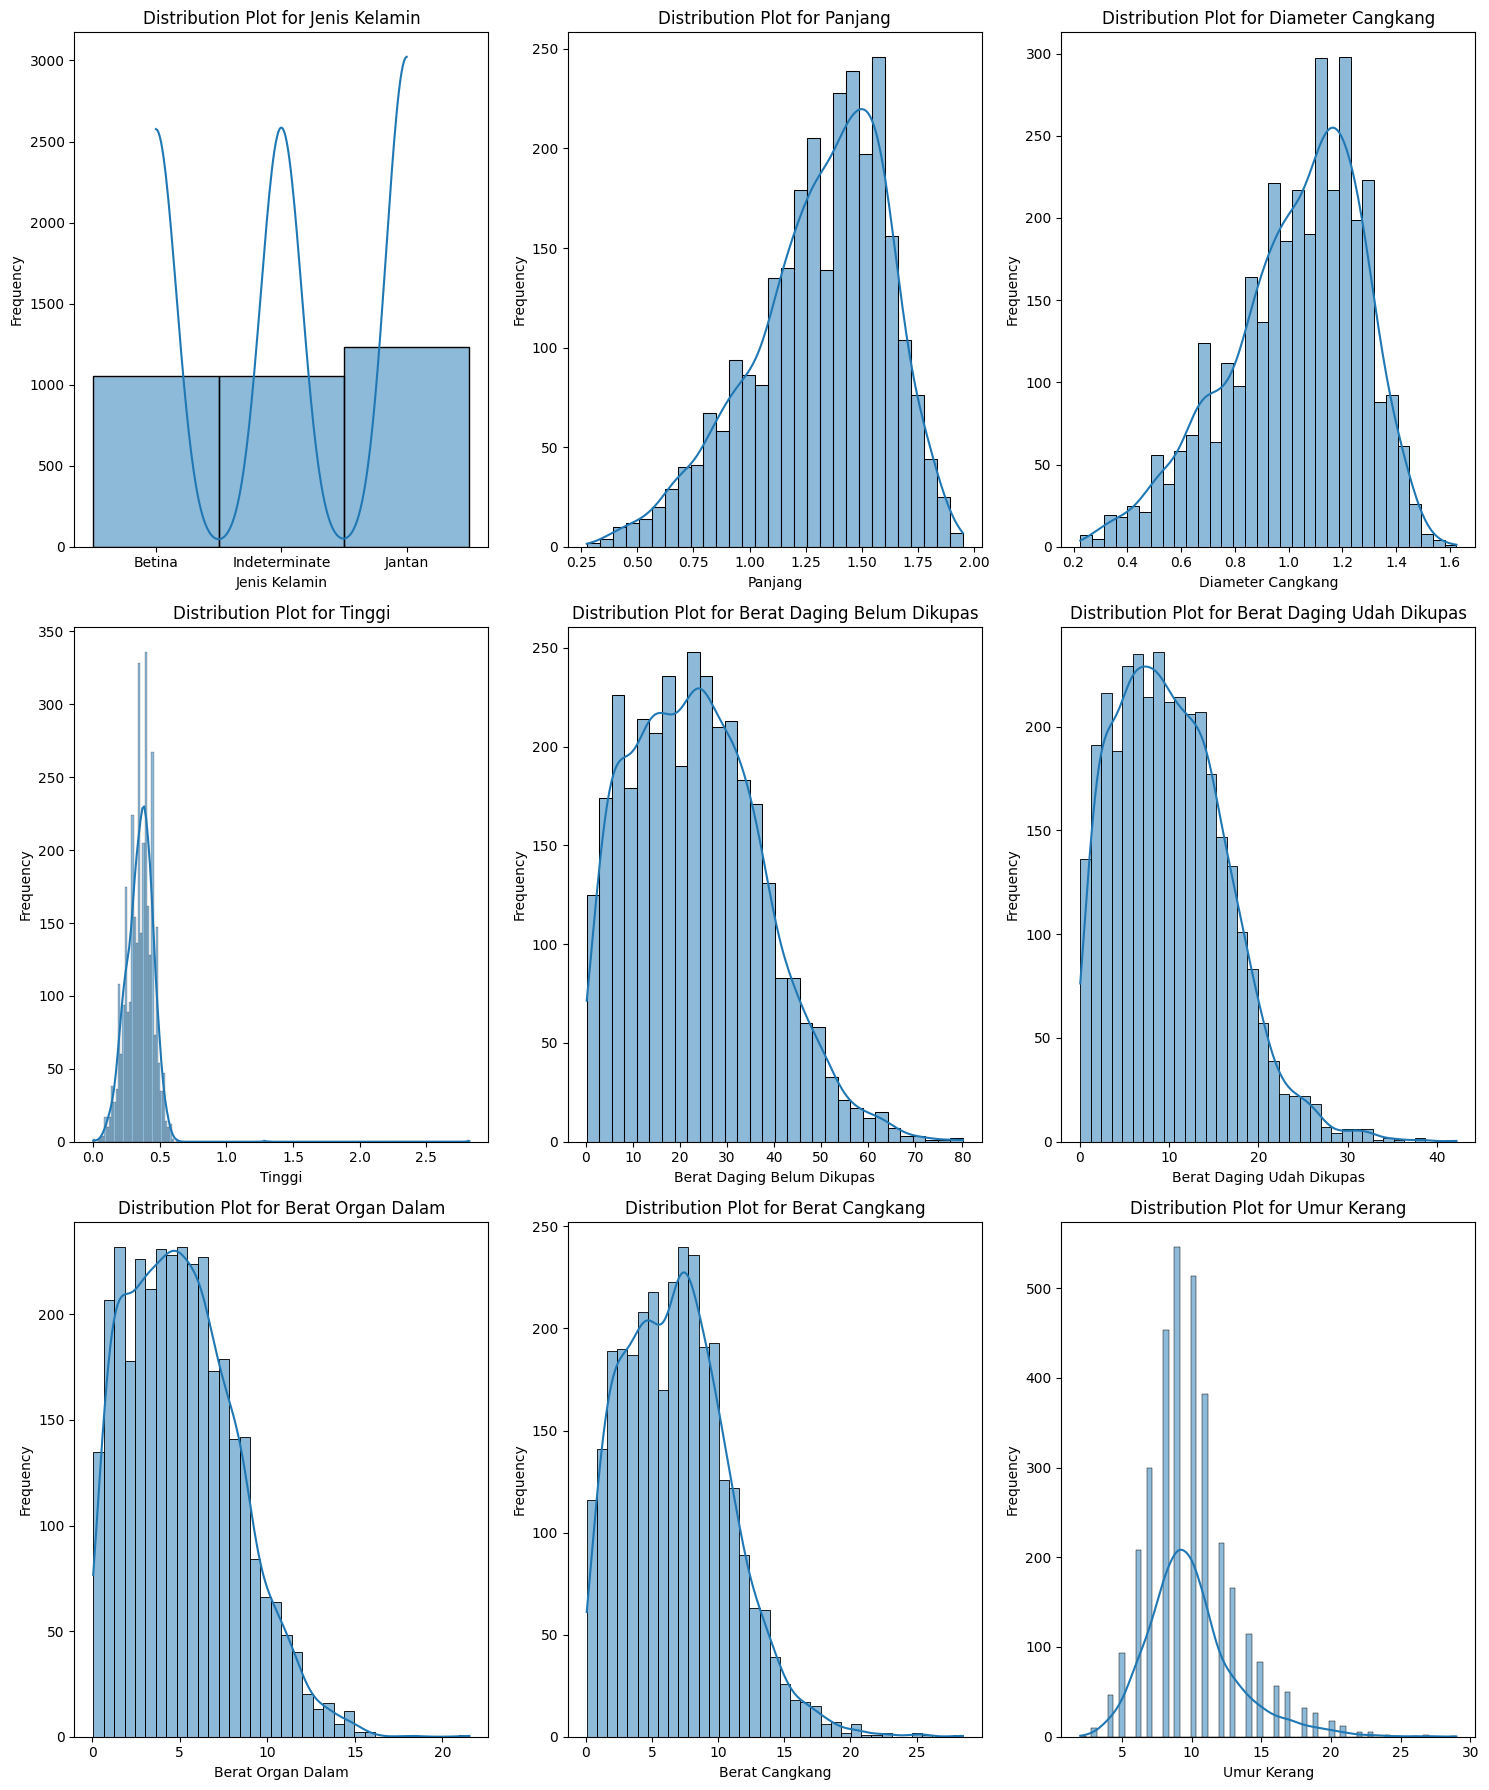

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns 

n_cols = 3  
n_rows = (len(data.columns) + n_cols - 1) // n_cols  

plt.figure(figsize=(5 * n_cols, 6 * n_rows))

for i, column in enumerate(data.columns, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.histplot(data[column], kde=True)
    plt.title(f'Distribution Plot for {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

## Boxplot

But to assist us further in Identifying the Gender distribution to all of the features, using a Boxplot will help.
As well as a boxplot for age Distribution by Gender since it is our target variable. It is also used to identify some outliers in our data.

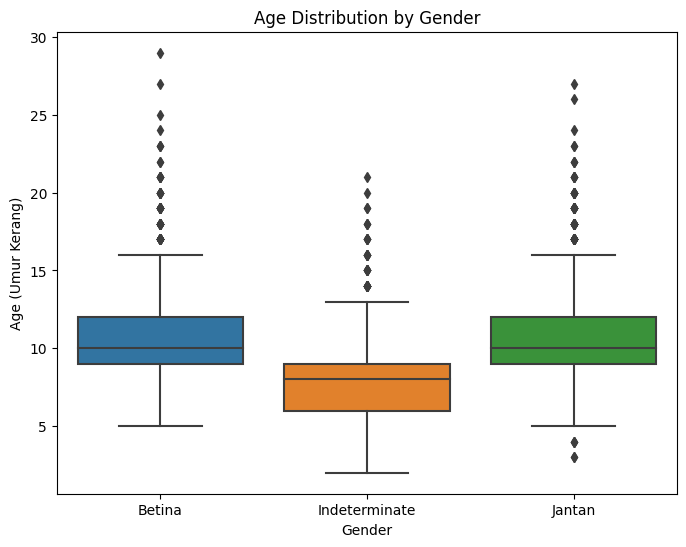

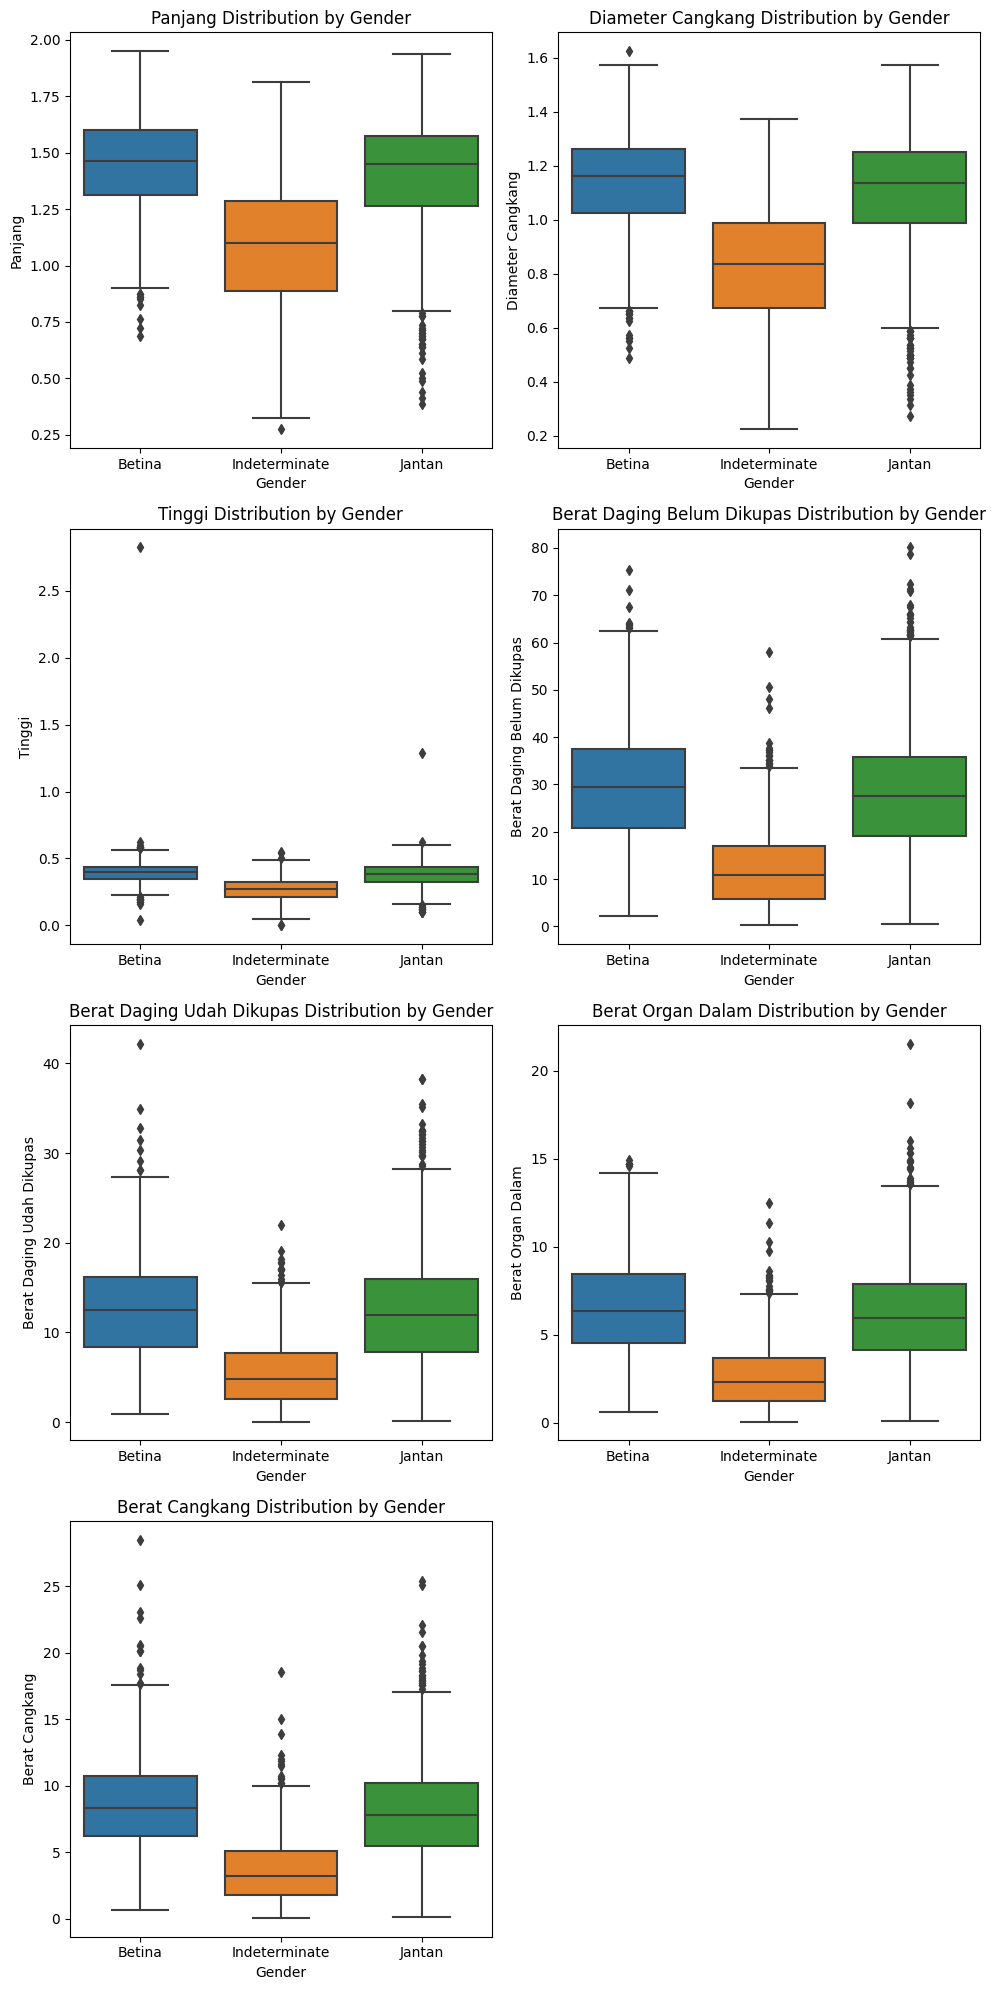

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of numerical columns excluding the target variable (Umur)
numerical_columns = ['Panjang', 'Diameter Cangkang', 'Tinggi', 
                     'Berat Daging Belum Dikupas', 'Berat Daging Udah Dikupas', 
                     'Berat Organ Dalam', 'Berat Cangkang']

# A boxplot for age distribution by gender
plt.figure(figsize=(8, 6))
sns.boxplot(x='Jenis Kelamin', y='Umur Kerang', data=data)
plt.title('Age Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Age (Umur Kerang)')
plt.show()

# Boxplots for other numerical variables by gender
n_cols = 2  # Number of columns in the grid
n_rows = (len(numerical_columns) + n_cols - 1) // n_cols  # Calculate number of rows needed
plt.figure(figsize=(10, 5 * n_rows))

for i, column in enumerate(numerical_columns, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.boxplot(x='Jenis Kelamin', y=column, data=data)
    plt.title(f'{column} Distribution by Gender')
    plt.xlabel('Gender')
    plt.ylabel(column)

plt.tight_layout()
plt.show()


With this we are able to analyze how each Gender affects each of the other features.
As well as the correlation between Clam age and its gender.

## Data preprocessing

In [91]:
print(data.isnull().sum())

Jenis Kelamin                   0
Panjang                       664
Diameter Cangkang               0
Tinggi                         83
Berat Daging Belum Dikupas      0
Berat Daging Udah Dikupas       0
Berat Organ Dalam               0
Berat Cangkang                234
Umur Kerang                     0
dtype: int64


We have a few missing values here, let's get rid of them:

In [92]:
# Drop rows with missing data
data_cleaned = data.dropna()

# Check the shape of the cleaned dataset
print(data_cleaned.shape)

(2430, 9)


After dropping the data, for increased accuracy, Imputation based on groups can help since it fills in missing values in a way that preserves relationships in the data.

In [93]:
# Filling missing 'Panjang' values with the mean for each gender group
data['Panjang'] = data.groupby('Jenis Kelamin')['Panjang'].transform(lambda x: x.fillna(x.mean()))

# Doing the same for 'Tinggi' and 'Berat Cangkang'
data['Tinggi'] = data.groupby('Jenis Kelamin')['Tinggi'].transform(lambda x: x.fillna(x.mean()))
data['Berat Cangkang'] = data.groupby('Jenis Kelamin')['Berat Cangkang'].transform(lambda x: x.fillna(x.mean()))

print(data.isnull().sum())

Jenis Kelamin                 0
Panjang                       0
Diameter Cangkang             0
Tinggi                        0
Berat Daging Belum Dikupas    0
Berat Daging Udah Dikupas     0
Berat Organ Dalam             0
Berat Cangkang                0
Umur Kerang                   0
dtype: int64


In [94]:
print(data_cleaned.shape)

(2430, 9)


And it will appear that the shape of the data is still the same, hence it is working on the cleaned data.

To ensure all the numerical features are on a similar scale, we can use the StandardScaler for normalization. 

But before that, let's use One Hot encoding for our "Jenis Kelamin" column because it is categorical.

## One-hot Encoding

<div align="center">
    <img src="https://miro.medium.com/v2/resize:fit:1400/1*ggtP4a5YaRx6l09KQaYOnw.png" width="1000" height="300"/>
</div>

In [95]:
# Applying One-Hot Encoding to the 'Jenis Kelamin' column using the cleaned dataset
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

# Applying One-Hot Encoding to 'Jenis Kelamin'
# Extract the 'Jenis Kelamin' column from the dataset for encoding
OH = OneHotEncoder(sparse_output=False, drop=None, handle_unknown='ignore')

# Fit and transform the 'Jenis Kelamin' column
encoded_features = OH.fit_transform(data_cleaned[['Jenis Kelamin']])

# Convert the encoded features into a DataFrame
encoded_df = pd.DataFrame(encoded_features, columns=OH.get_feature_names_out(['Jenis Kelamin']), index=data_cleaned.index)

# Drop the original 'Jenis Kelamin' column from the dataset
data_cleaned_encoded = data_cleaned.drop(columns=['Jenis Kelamin'])

# Concatenate the encoded columns with the dataset
data_cleaned_encoded = pd.concat([data_cleaned_encoded, encoded_df], axis=1)

print(f'Encoded and scaled dataset shape: {data_cleaned_encoded.shape}')

Encoded and scaled dataset shape: (2430, 11)


In [96]:
from sklearn.preprocessing import StandardScaler

numerical_features = ['Panjang', 'Diameter Cangkang', 'Tinggi', 
                      'Berat Daging Belum Dikupas', 'Berat Daging Udah Dikupas', 
                      'Berat Organ Dalam', 'Berat Cangkang']

#Intialize the scaler
scaler = StandardScaler()

#Fitting and transforming the features
data_cleaned_encoded[numerical_features] = scaler.fit_transform(data_cleaned_encoded[numerical_features])

In [97]:
data_cleaned_encoded.head()

,Panjang,Diameter Cangkang,Tinggi,Berat Daging Belum Dikupas,Berat Daging Udah Dikupas,Berat Organ Dalam,Berat Cangkang,Umur Kerang,Jenis Kelamin_Betina,Jenis Kelamin_Indeterminate,Jenis Kelamin_Jantan
0,-0.015899,0.145970,0.090752,-0.084240,-0.129664,0.237584,-0.030760,15,1.0,0.0,0.0
2,-0.643072,-0.917847,-0.933371,-0.935109,-0.870367,-0.986830,-0.911512,9,0.0,0.0,1.0
3,0.109536,-0.208636,-0.364414,-0.438006,-0.500016,-0.228424,-0.383061,8,0.0,1.0,0.0
7,1.238448,1.361760,1.001084,1.822845,2.316012,1.192444,1.582776,13,0.0,0.0,1.0
8,0.862144,0.855181,1.114876,0.659889,0.780407,0.260428,-0.576826,10,1.0,0.0,0.0


Where 1.0 = True and 0.0 = False, for the Gender features.

## Feature Engineering

<div align="center">
    <img src="https://analyticsindiamag.com/wp-content/uploads/2019/06/aq.png" width="500" height="300"/>
</div>


There are some features that we can manipulate here

We can calculate the volume of the clams using their dimensions and we can take the ratio of the Organ weights:

In [98]:
# Volume feature
data_cleaned_encoded['Volume'] = data_cleaned_encoded['Panjang'] * data_cleaned_encoded['Diameter Cangkang'] * data_cleaned_encoded['Tinggi']

In [99]:
# Ratio of organ weight feature
data_cleaned_encoded['Rasio_Berat_Organ'] = data_cleaned_encoded['Berat Organ Dalam'] / data_cleaned_encoded['Berat Daging Belum Dikupas']

## Finding the Correlation
Using the correlation matrix

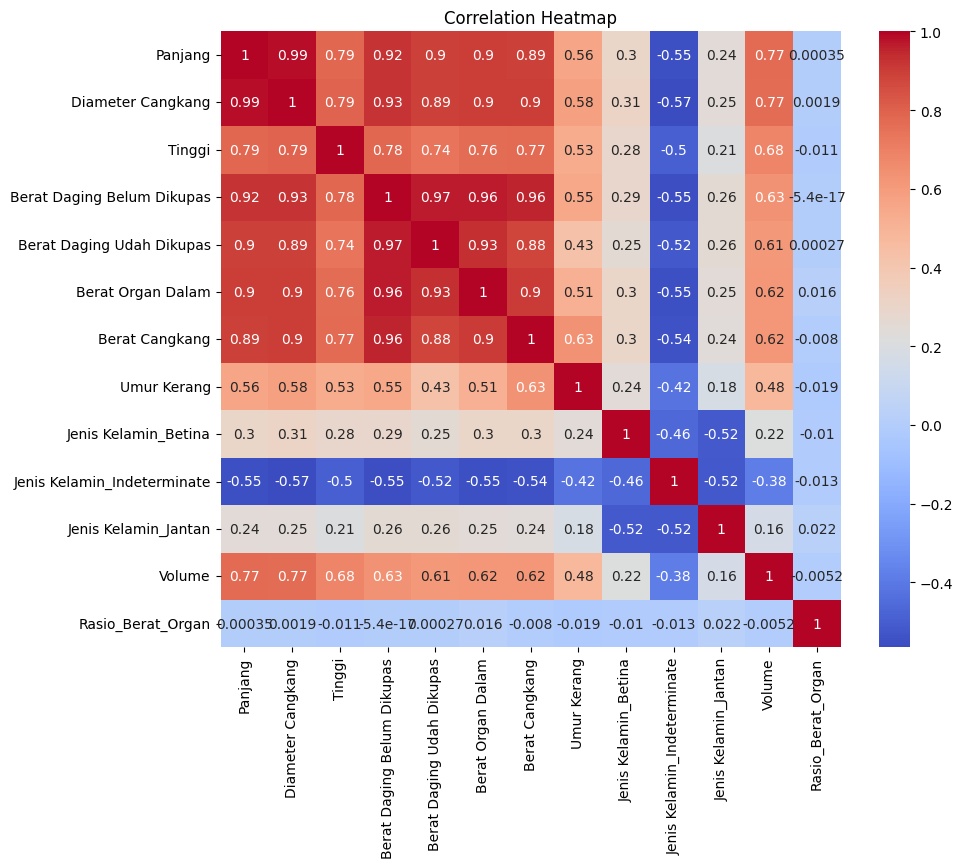

In [100]:
import seaborn as sns
import matplotlib.pyplot as plt

# Creating the correlation matrix
corr_matrix = data_cleaned_encoded.corr()

# Plotting the heatmap
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

Here we can inferr that some features highly correlated, that may be redundant and can be removed to reduce multicollinearity. To do this I will make a threshold, considering a high correlation is 0.85, 
then iterate over the correlation matrix to find pairs of features that are highly correlated.

In [101]:
import numpy as np

# Setting a threshold for high correlation
correlation_threshold = 0.85

# Create an empty set to hold features to drop
features_to_drop = set()

# Iterating over the correlation matrix
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > correlation_threshold:
            colname = corr_matrix.columns[i]
            features_to_drop.add(colname)

# Print features to drop based on high correlation
print(f'Features to drop: {features_to_drop}')

Features to drop: {'Diameter Cangkang', 'Berat Daging Udah Dikupas', 'Berat Cangkang', 'Berat Organ Dalam', 'Berat Daging Belum Dikupas'}


It appears that these features have a correlation above the threshold, if two or more features are highly correlated, they carry almost the same information and the model may struggle to distinguish between them.
To combat that, let's drop those features.

In [102]:
# List of features to drop
features_to_drop = ['Berat Daging Belum Dikupas', 'Berat Organ Dalam', 'Berat Daging Udah Dikupas', 'Diameter Cangkang', 'Berat Cangkang']

# Drop the identified features
data_reduced_encoded =data_cleaned_encoded.drop(columns=features_to_drop)

# Checking the shape of the reduced dataset
print(f'Reduced dataset shape: {data_reduced_encoded.shape}')

Reduced dataset shape: (2430, 8)


In [103]:
data_reduced_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2430 entries, 0 to 3341
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Panjang                      2430 non-null   float64
 1   Tinggi                       2430 non-null   float64
 2   Umur Kerang                  2430 non-null   int64  
 3   Jenis Kelamin_Betina         2430 non-null   float64
 4   Jenis Kelamin_Indeterminate  2430 non-null   float64
 5   Jenis Kelamin_Jantan         2430 non-null   float64
 6   Volume                       2430 non-null   float64
 7   Rasio_Berat_Organ            2430 non-null   float64
dtypes: float64(7), int64(1)
memory usage: 170.9 KB


## Visualizing the Data again after dropping highly correlated features:

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

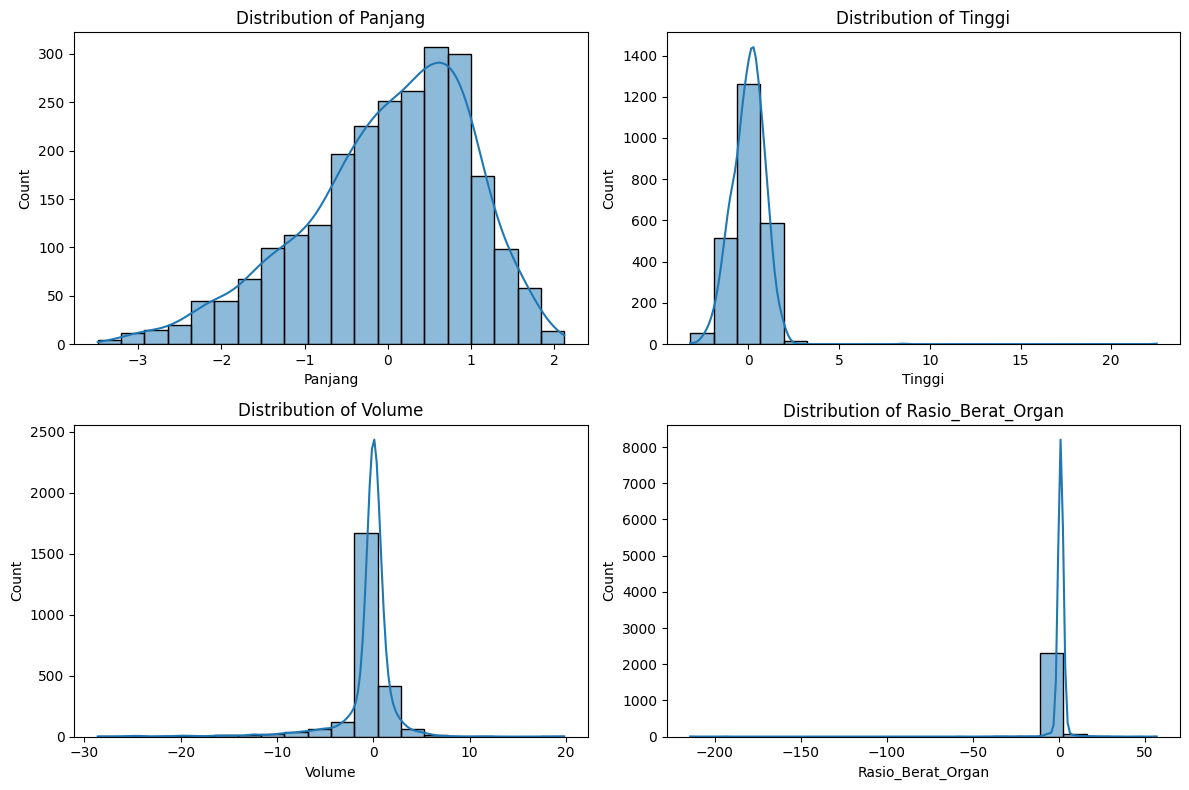

In [70]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting distributions of numerical features
numerical_features = ['Panjang', 'Tinggi', 'Volume', 'Rasio_Berat_Organ']

plt.figure(figsize=(12, 8))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(2, 2, i)
    sns.histplot(data_reduced_encoded[feature], kde=True, bins=20)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

Pairplot to see the relation between numerical features and target (Umur Kerang):

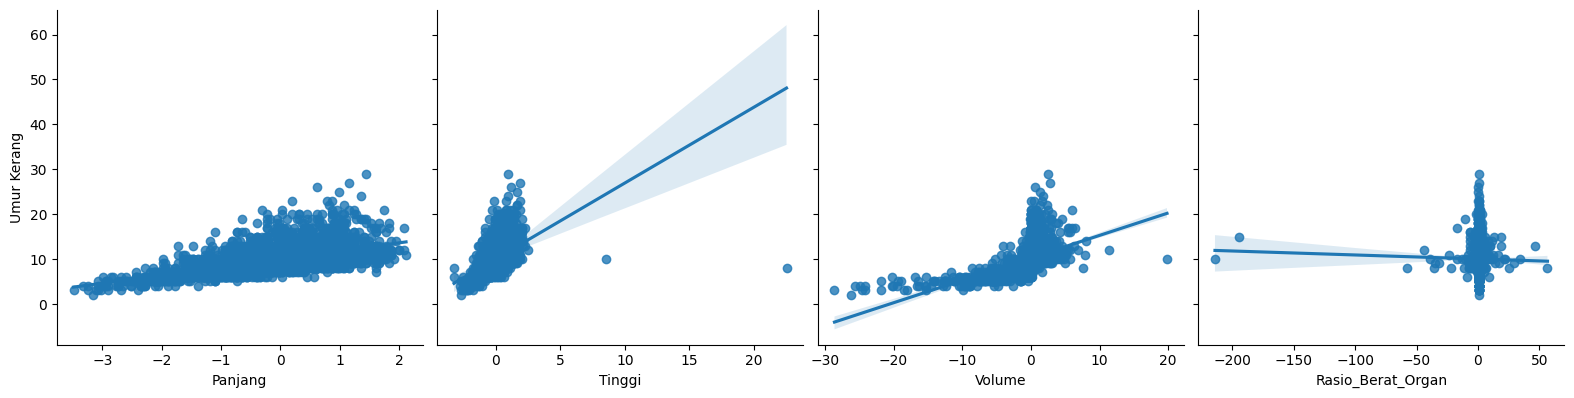

In [71]:
sns.pairplot(data_reduced_encoded, x_vars=numerical_features, y_vars='Umur Kerang', kind='reg', height=4)
plt.show()

Based on the visualizations (histogram and pairplot) above, Panjang and Tinggi show strong relationships with the target variable (linearly), Umur Kerang. This suggests that these features are likely to be strong predictors in the model that we're trying to make. Volume, on the other hand, shows some predictive potential, but the presence of outliers may be hindering its overall relationship with Umur Kerang. Rasio berat organ seems problematic, as the graph is going downwards, hinting that it may not contribute much to the predictive power of the model here.

## Splitting the Data

<div align="center">
    <img src="https://miro.medium.com/v2/resize:fit:388/1*QSXxOderidihfo1itIE7cw.png" width="500" height="300"/>
</div>

In [104]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = data_reduced_encoded.drop(columns='Umur Kerang')
y = data_reduced_encoded['Umur Kerang']

# Splitting the data: 80% for training, 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f'Training set shape: {X_train.shape}, Test set shape: {X_test.shape}')

Training set shape: (1944, 7), Test set shape: (486, 7)


## Removing Outliers

In [105]:
# Define target (y) and features (X)
y = data_reduced_encoded['Umur Kerang']  # Replace with the target column name
X = data_reduced_encoded.drop(columns=['Umur Kerang'])  # Drop the target column

# Split the data into training and validation sets (if needed)
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=1)

# Store the original indices before dropping outliers
original_indices = X_train.index

# Initialize an empty set to store indices of outliers
outlier_indices = set()

# Loop through each numeric column and identify outliers based on the IQR method
for column in X_train.select_dtypes(include=['number']).columns:
    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = X_train[column].quantile(0.25)
    Q3 = X_train[column].quantile(0.75)
    IQR = Q3 - Q1
    
    # Determine the lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Identify the indices of outliers
    column_outliers = X_train[(X_train[column] < lower_bound) | (X_train[column] > upper_bound)].index
    outlier_indices.update(column_outliers)

# Convert the set of outlier indices to a list
outlier_indices = list(outlier_indices)

# Drop the outliers from X_train and y_train
X_train = X_train.drop(outlier_indices)
y_train = y_train.drop(outlier_indices)

# Display the indices of dropped outliers (optional)
print("Indices of dropped outliers:", outlier_indices)

Indices of dropped outliers: [0, 2050, 2053, 2054, 7, 2056, 2057, 13, 2061, 2066, 18, 2067, 2070, 23, 2072, 2073, 2077, 2078, 2079, 34, 2084, 2085, 2089, 2090, 45, 46, 2096, 2097, 50, 2099, 52, 2100, 55, 2104, 59, 2109, 61, 64, 2113, 67, 2119, 73, 2122, 75, 2125, 78, 81, 85, 2133, 87, 2135, 88, 89, 2140, 2141, 94, 101, 2150, 104, 2152, 108, 2158, 112, 2164, 2166, 121, 122, 2174, 2175, 2176, 129, 2177, 131, 135, 136, 2185, 138, 139, 2188, 2186, 2184, 143, 144, 2193, 2187, 149, 2199, 153, 155, 156, 159, 162, 2211, 2214, 2215, 2217, 169, 2220, 174, 2225, 177, 2227, 180, 182, 2232, 187, 189, 192, 193, 2242, 196, 197, 2252, 204, 2256, 210, 212, 2261, 2262, 2263, 219, 2267, 223, 224, 2272, 227, 228, 2276, 230, 2278, 232, 233, 234, 235, 2287, 240, 2290, 243, 2292, 245, 2291, 2293, 252, 253, 2302, 258, 2310, 263, 266, 267, 2318, 2319, 2323, 2325, 2326, 2328, 286, 287, 298, 2347, 301, 304, 2352, 2354, 306, 307, 314, 2369, 2371, 324, 325, 2373, 2376, 330, 2380, 2381, 336, 2385, 2386, 340, 341, 2

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

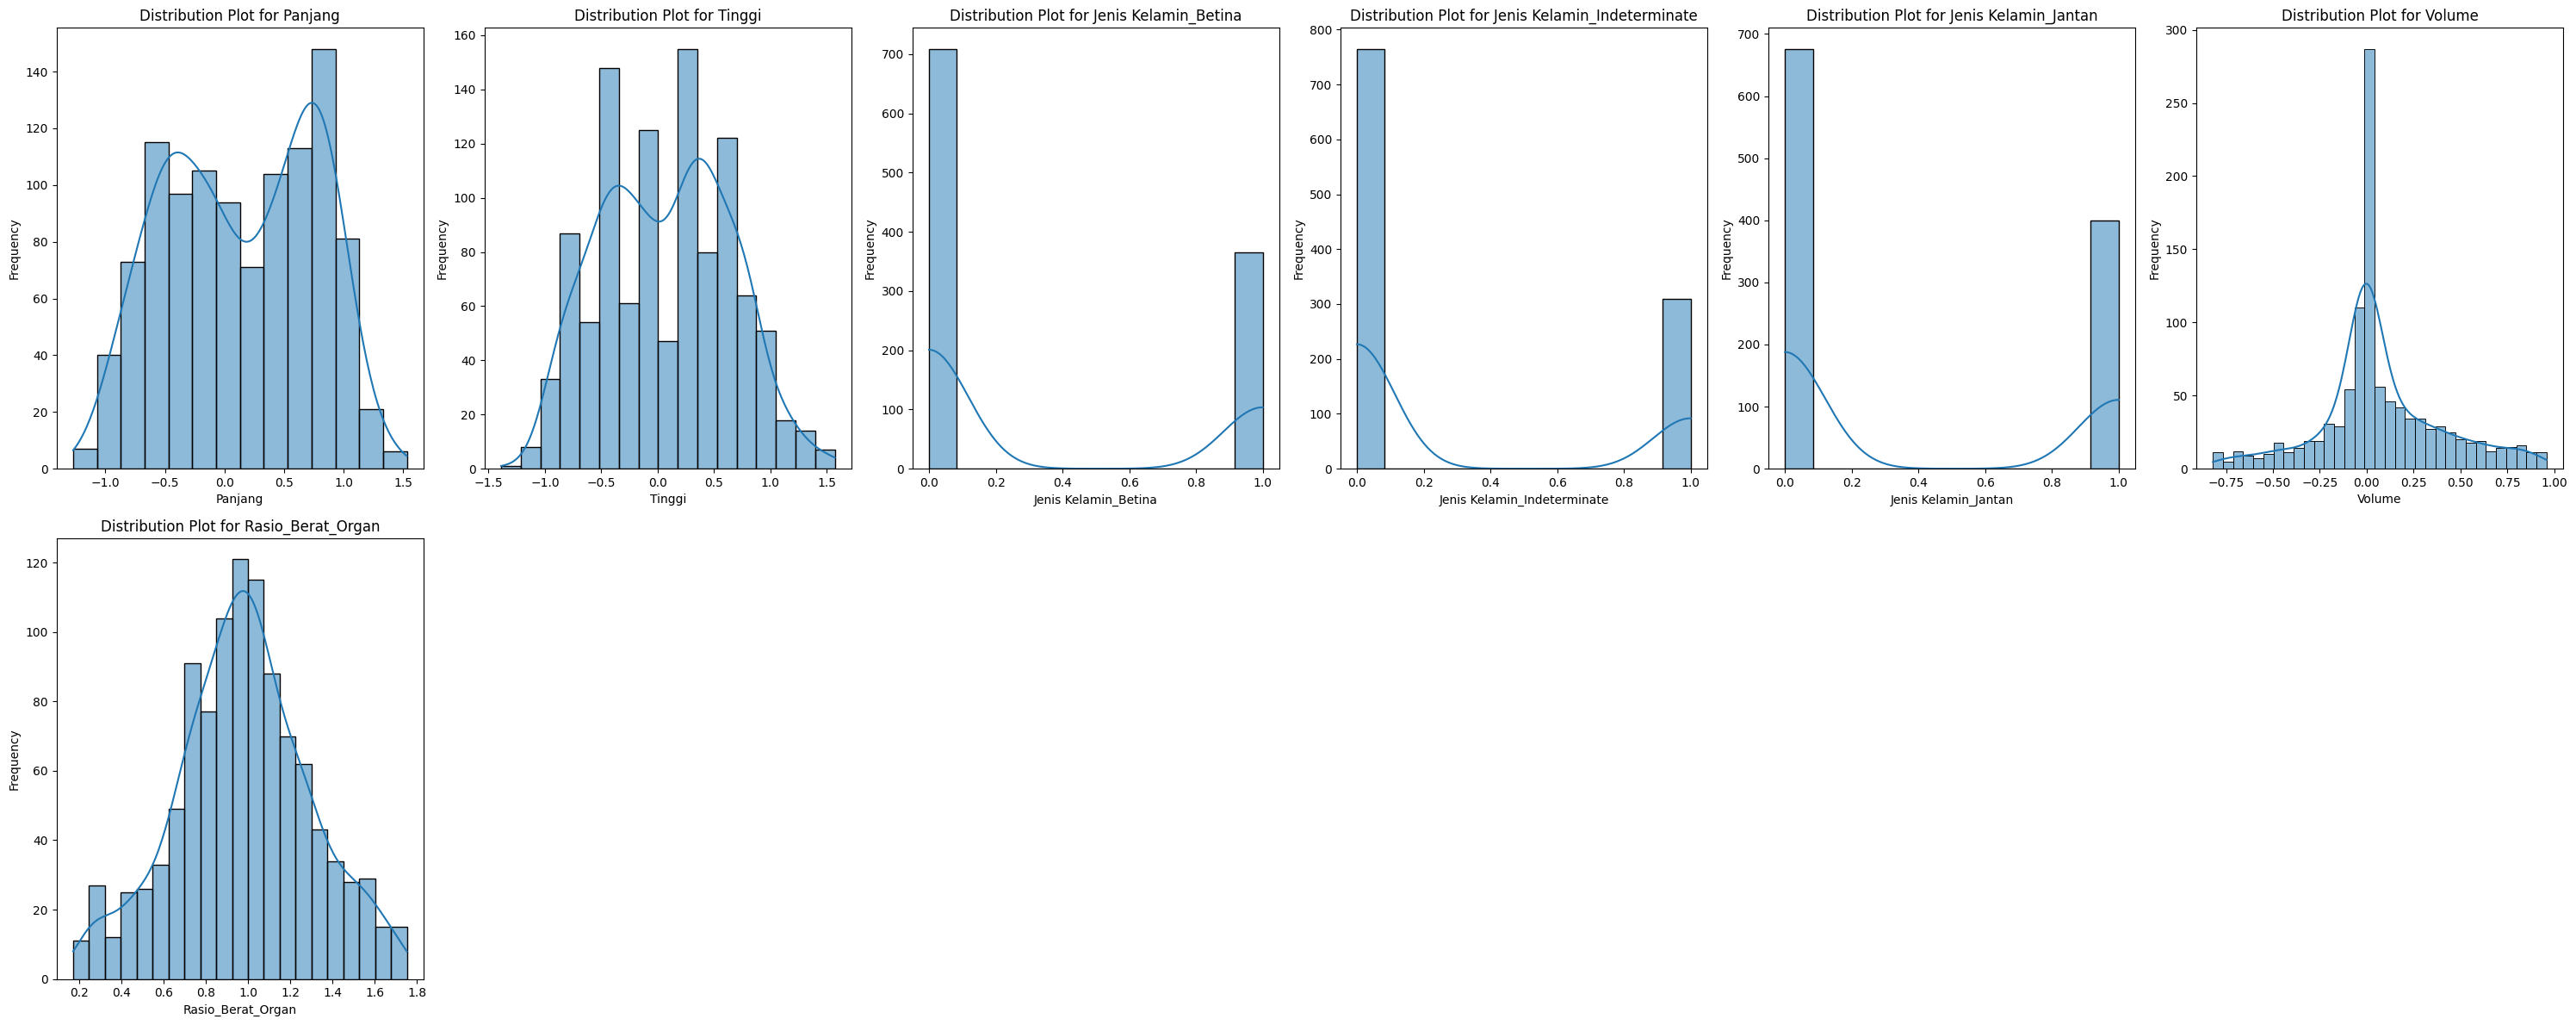

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the number of rows and columns for the subplot grid
n_cols = 6  # Number of columns in the grid
n_rows = (len(X_train.columns) + n_cols - 1) // n_cols  # Calculate rows needed, rounding up

# Create a figure and a grid of subplots
plt.figure(figsize=(5 * n_cols, 6 * n_rows))

for i, column in enumerate(X_train.columns, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.histplot(X_train[column], kde=True)
    plt.title(f'Distribution Plot for {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

## Modeling :D

During our final stage which is modeling, I am going to compare two models which are Linear Regression and Random Forest Regression.

### Linear Regression

<div align="left">
    <img src="https://media.geeksforgeeks.org/wp-content/uploads/20231129130431/11111111.png" width="500" height="450"/>
</div>

In [114]:
from sklearn.linear_model import LinearRegression

# Initialize and train the Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Make predictions
y_pred_train = lr_model.predict(X_train)
y_pred_test = lr_model.predict(X_test)

# Print model coefficients
print(f'Coefficients: {lr_model.coef_}')
print(f'Intercept: {lr_model.intercept_}')


Coefficients: [-0.42517553  1.50444268  0.43833714 -0.50911392  0.07077678  1.15647837
 -0.54696356]
Intercept: 10.577319711847277


Now, let's evaluate the model by calculating its Mean Squared Error, Mean Absolute Error, and it's R^2 value.

* Where MAE is the average of all absolute errors-The absolute average distance between the real data and the predicted data. 
* MSE which measures the average of the squares of the errors— that is, the average squared difference between the estimated values and the actual value. Closer to zero is better.
* R^2. that shows how well the model predicts the outcome of the dependent variable (predictive features), R-Squared values range from 0 to 1. Closer to 1 means its better.

In [115]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Evaluate model on training set
mae_train = mean_absolute_error(y_train, y_pred_train)
mse_train = mean_squared_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)

# Evaluate Linear Regression model on test set
mae_test = mean_absolute_error(y_test, y_pred_test)
mse_test = mean_squared_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

print(f'Training Set: MAE={mae_train}, MSE={mse_train}, R²={r2_train}')
print(f'Test Set: MAE={mae_test}, MSE={mse_test}, R²={r2_test}')


Training Set: MAE=1.812675746789675, MSE=6.063408821985243, R²=0.1929160693623384
Test Set: MAE=2.7860367627663196, MSE=22.0176485663403, R²=-1.3953779560725104


Let's try predicting an age of A 'Jantan' Clam.

In [109]:
new_clam_data = {
    'Panjang': [1.2],  
    'Tinggi': [0.8],   
    'Volume': [0.96],
    'Rasio_Berat_Organ': [0.5],
    'Jenis Kelamin_Jantan': [1],  # One-hot encoded 'Jantan'
    'Jenis Kelamin_Indeterminate': [0],  # One-hot encoded 'Indeterminate'
    'Jenis Kelamin_Betina': [0], # One-hot encoded 'Betina'
    'Berat Cangkang': [4],
    'Berat Daging Belum Dikupas': [22],
    'Berat Daging Udah Dikupas': [9],
    'Berat Organ Dalam': [7.2],
    'Diameter Cangkang': [1.3]
}

# Convert to dataframe
new_clam_data = pd.DataFrame(new_clam_data)[X_train.columns]

# Predict the age using the trained Linear Regression Model
predicted_age = lr_model.predict(new_clam_data)

# Output the predicted age
print(f'Predicted Age of the Clam: {predicted_age[0]:.2f} years')

Predicted Age of the Clam: 12.18 years


It would seem like using a Linear Regression Model is not quite fit to make this type of prediction. Hinting the very low R^2 value, signifying that only about 19% of our training data is explained by this model.

### Random Forest Regression
<div align="left">
    <img src="https://miro.medium.com/v2/resize:fit:1200/1*6r7FJCznsio0uEdcWz5ypw.png" width="500" height="450"/>
</div>

Random Forest Regression is a versatile machine-learning technique for predicting numerical values. It combines the predictions of multiple decision trees to reduce overfitting and improve accuracy.
(https://www.geeksforgeeks.org/random-forest-regression-in-python/)

In [117]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Initialize and train the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict on training and test sets
y_pred_rf_train = rf_model.predict(X_train)
y_pred_rf_test = rf_model.predict(X_test)

# Evaluate Random Forest model
rf_mae_train = mean_absolute_error(y_train, y_pred_rf_train)
rf_mse_train = mean_squared_error(y_train, y_pred_rf_train)
rf_r2_train = r2_score(y_train, y_pred_rf_train)

rf_mae_test = mean_absolute_error(y_test, y_pred_rf_test)
rf_mse_test = mean_squared_error(y_test, y_pred_rf_test)
rf_r2_test = r2_score(y_test, y_pred_rf_test)

print(f'Random Forest -> Training Set: MAE={rf_mae_train}, MSE={rf_mse_train}, R²={rf_r2_train}')
print(f'Random Forest -> Test Set: MAE={rf_mae_test}, MSE={rf_mse_test}, R²={rf_r2_test}')

Random Forest -> Training Set: MAE=0.7171720930232558, MSE=0.9495946046511629, R²=0.8736020333553485
Random Forest -> Test Set: MAE=1.5947736625514402, MSE=4.597032098765432, R²=0.4998725990397266


Now, let's do the same and try to predict the age of this 'Jantan' clam.

In [116]:
# Example new clam feature data (values should match your features like 'Panjang', 'Tinggi', etc.)
new_clam_data = {
    'Panjang': [1.2],  
    'Tinggi': [0.8],   
    'Volume': [0.96],
    'Rasio_Berat_Organ': [0.5],
    'Jenis Kelamin_Jantan': [1],  # One-hot encoded 'Jantan'
    'Jenis Kelamin_Indeterminate': [0],  # One-hot encoded 'Indeterminate'
    'Jenis Kelamin_Betina': [0], # One-hot encoded 'Betina'
    'Berat Cangkang': [4],
    'Berat Daging Belum Dikupas': [22],
    'Berat Daging Udah Dikupas': [9],
    'Berat Organ Dalam': [7.2],
    'Diameter Cangkang': [1.3]
}

# Convert to dataframe
new_clam_data = pd.DataFrame(new_clam_data)[X_train.columns]

# Predict the age using the trained Random Forest model
predicted_age = rf_model.predict(new_clam_data)

# Output the predicted age
print(f'Predicted Age of the Clam: {predicted_age[0]:.2f} years')

Predicted Age of the Clam: 16.45 years


#### It can be concluded and (I will assume) and say that using a Random Forest Regression model is able to predict the Clam Age better, where the model can explain roughly 87% of the variance in the training data.